In [1]:
#Paquetes necesarios
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cfit

In [ ]:
#Constantes útiles y condiciones iniciales
gamma_r = 1/5
gamma_p = 1/30
k_r = 1
k_p = 66
r_0 = 0
p_0 = 0

In [ ]:
#Punto 1.A y 1.B
def simPrim(r_0,p_0,t_max,dt):
    t = np.arange(0,t_max,dt)
    r = np.zeros(len(t))
    p = np.zeros(len(t))
    r[0] = r_0
    p[0] = p_0
    
    for i in range(len(r)-1):
        p1 = k_r*dt 
        #p1 = k_r/(1+(p[i]/k_r)**2)*dt #Punto 1.D. Solo hace falta quitar el siguiente comentario y correr todo lo demás
        p2 = gamma_r*r[i]*dt
        p3 = k_p*r[i]*dt
        p4 = gamma_p*p[i]*dt
        pT = p1+p2+p3+p4
        
        al = np.random.rand()
        if al < p1/pT:
            r[i+1] = r[i]+1
            p[i+1] = p[i]
            
        elif al < (p1+p2)/pT:
            r[i+1] = r[i]-1
            p[i+1] = p[i]
            
        elif al < (p1+p2+p3)/pT:
            r[i+1] = r[i]
            p[i+1] = p[i]+1

        else:
            r[i+1] = r[i]
            p[i+1] = p[i]-1
            
    return r,p

#Parámetros necesarios para la simulación
n_celulas = 500
dt = 1e-3
t_max = 80

#Punto 1.c. Para este, únicamente hay que quitar el comentario de las siguientes 4 líneas y correr de nuevo
#import time
#n_celulas = 100
#t = np.linspace(0,t_max,int(10/gamma_p))
#dt = t[1]-t[0]
#comienzo = time.clock()

#Lista que contiene la simulación para cada célula
rs = []
ps = []

#La simulación se demora casi 8 minutos en correr. Mil disculpas
for n in range(n_celulas):
    r1,p1 = simPrim(r_0,p_0,t_max,dt)
    rs.append(r1)
    ps.append(p1)
    
#print("tiempo transcurrido: {}".format(time.clock()-comienzo))

rs = np.array(rs)
ps = np.array(ps)

#Listas en las que se guarda el comportamiento promedio de toda la población
rProm = []
pProm = []

for i in range(len(rs[0])):
    rProm.append(np.mean(rs.T[i]))
    pProm.append(np.mean(ps.T[i]))
    
#Calculando el ruido general
ruido_RS1 = np.std(rProm)/(np.mean(rProm))
ruido_PS1 = np.std(pProm)/(np.mean(pProm))

#Graficando
t = np.arange(0,t_max,dt)
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title("RNAs promedio para 500 células",fontsize=13.7)
plt.plot(t,rProm,label="$\eta_R = {:.3f}$".format(ruido_RS1))
plt.grid(True)
plt.ylabel("RNAs [arb]",fontsize=12)
plt.xlabel("$t$ (min)",fontsize=12)
plt.legend(fontsize=12)

plt.subplot(122)
plt.title("Proteínas promedio para 500 células",fontsize=13.7)
plt.plot(t,pProm,label="$\eta_P = {:.3f}$".format(ruido_PS1))
plt.grid(True)
plt.ylabel("Proteínas [arb]",fontsize=12)
plt.xlabel("$t$ (min)",fontsize=12)
plt.legend(fontsize=12)

plt.savefig("PrimitivoP1AB.png")

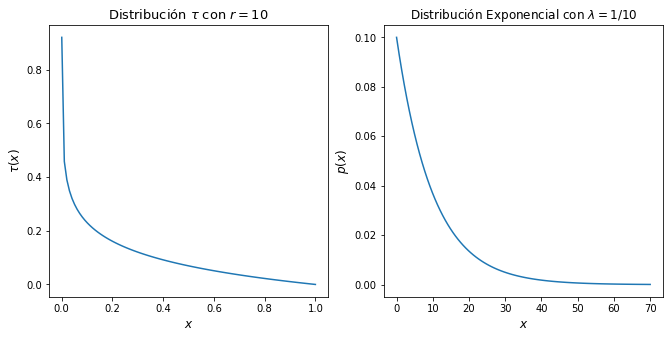

In [3]:
#Punto 2.A 
r = 10 #r para las gráficas

def distExp(x,r): #Distribución exponencial de parámetro r
    lambd = 1/r
    return lambd*np.exp(-lambd*x)

def tau(x,r): #Distribución tau dada en clase
    return (1/r)*np.log(1/x)

#Arrays para graficar
x = np.linspace(0,70,100)
x_u = np.linspace(0.0001,0.9999,100)

#Graficando
plt.figure(figsize=(11,5))
plt.subplot(121)
plt.title("Distribución $\\tau$ con $r = {}$".format(r),fontsize=13)
plt.plot(x_u,tau(x_u,r))
plt.xlabel("$x$",fontsize=12)
plt.ylabel("$\\tau(x)$",fontsize=12)

plt.subplot(122)
plt.title("Distribución Exponencial con $\lambda = 1/{}$".format(r))
plt.plot(x,distExp(x,r))
plt.xlabel("$x$",fontsize=12)
plt.ylabel("$p(x)$",fontsize=12)

plt.savefig("ComparacionP2A.png")

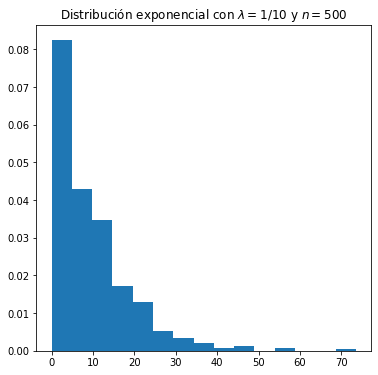

In [4]:
#Punto 2.B
#Generando los números aleatorios con distribución exponencial
r = 10
nums = np.random.exponential(scale = r, size = 500)

#Graficando
plt.figure(figsize=(6,6))
plt.title("Distribución exponencial con $\lambda = 1/{}$ y $n = 500$".format(r))
plt.hist(nums,bins=15,density=True)
plt.savefig("HistogramaP2B.png")

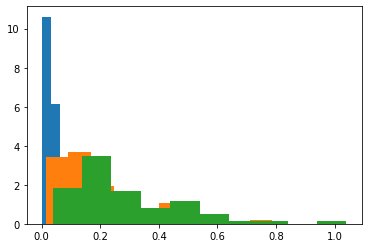

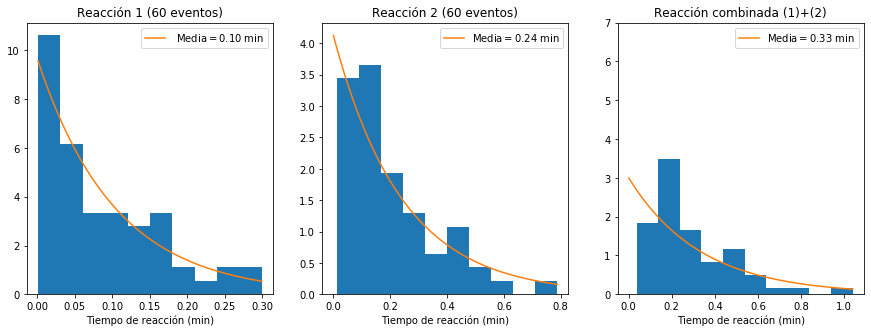

In [5]:
#Punto 2.C. Parámetros necesarios
N = 60
r1 = 10
r2 = 5
u1 = np.random.rand(N)
u2 = np.random.rand(N)

#Generando los tiempos de las reacciones
reaccion1 = tau(u1,r1)
reaccion2 = tau(u2,r2)
reaccionT = reaccion1+reaccion2

#Generando los ajustes de curva a los histogramas
d1 = plt.hist(reaccion1,density=True)
y1,x1 = d1[0],d1[1][0:-1]

d2 = plt.hist(reaccion2,density=True)
y2,x2 = d2[0],d2[1][0:-1]

d3 = plt.hist(reaccionT,density=True)
y3,x3 = d3[0],d3[1][0:-1]

pOpt1,pCov1 = cfit(distExp,x1,y1)
pOpt2,pCov2 = cfit(distExp,x2,y2)
pOpt3,pCov3 = cfit(distExp,x3,y3)

#Graficando
t1 = np.linspace(0.001,max(reaccion1),100)
t2 = np.linspace(0.001,max(reaccion2),100)
t3 = np.linspace(0.001,max(reaccionT),100)

plt.figure(figsize=(15,5))
t = "t"

plt.subplot(131)
plt.title("Reacción 1 (60 eventos)")
plt.hist(reaccion1,density=True)
plt.plot(t1,distExp(t1,pOpt1),label=" Media$= {:.2f}$ min".format(pOpt1[0]))
plt.xlabel("Tiempo de reacción (min)")
plt.legend()

plt.subplot(132)
plt.title("Reacción 2 (60 eventos)")
plt.hist(reaccion2,density=True)
plt.plot(t2,distExp(t2,pOpt2),label="Media$= {:.2f}$ min".format(pOpt2[0]))
plt.xlabel("Tiempo de reacción (min)")
plt.legend()

plt.subplot(133)
plt.title("Reacción combinada (1)+(2)")
plt.hist(reaccionT,density=True)
plt.plot(t3,distExp(t3,pOpt3),label="Media$={:.2f}$ min".format(pOpt3[0]))
plt.xlabel("Tiempo de reacción (min)")
plt.ylim(0,7)
plt.legend()

plt.savefig("HistsP2C.png")

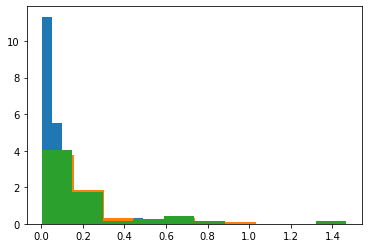

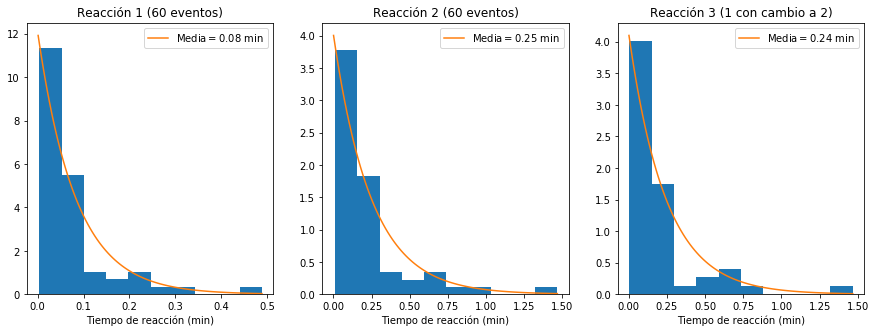

In [21]:
#Punto 2.D. Generando los histogramas independientes
aleatorio = np.random.rand(N)
r1D = 15
r2D = 5
serie1 = tau(aleatorio,r1D)
serie2 = tau(aleatorio,r2D)

#Para el evento propuesto
prob = np.random.rand(N) 
indFinal = np.where(prob < 1/3)[0][0] #Índice donde p < 1/3
ev1 = serie1[0:indFinal] #Slicing del evento 1 cuando p < 1/3
ev2 = serie2[indFinal:N-indFinal]
evF = np.concatenate((ev1,ev2)) #Pegado de ambos eventos

#Ajuste de histogramas
d1D = plt.hist(serie1,density=True)
y1D,x1D = d1D[0],d1D[1][0:-1]

d2D = plt.hist(serie2,density=True)
y2D,x2D = d2D[0],d2D[1][0:-1]

d3D = plt.hist(evF,density=True)
y3D,x3D = d3D[0],d3D[1][0:-1]

pOpt1D,pCov1D = cfit(distExp,x1D,y1D)
pOpt2D,pCov2D = cfit(distExp,x2D,y2D)
pOpt3D,pCov3D = cfit(distExp,x3D,y3D)

#Graficando
t1D = np.linspace(0.001,max(serie1),100)
t2D = np.linspace(0.001,max(serie2),100)
t3D = np.linspace(0.001,max(evF),100)

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.title("Reacción 1 (60 eventos)")
plt.hist(serie1,density=True)
plt.plot(t1D,distExp(t1D,pOpt1D),label="Media$= {:.2f}$ min".format(pOpt1D[0]))
plt.xlabel("Tiempo de reacción (min)")
plt.legend()

plt.subplot(132)
plt.title("Reacción 2 (60 eventos)")
plt.hist(serie2,density=True)
plt.plot(t2D,distExp(t2D,pOpt2D),label="Media$= {:.2f}$ min".format(pOpt2D[0]))
plt.xlabel("Tiempo de reacción (min)")
plt.legend()

plt.subplot(133)
plt.title("Reacción 3 (1 con cambio a 2)")
plt.hist(evF,density=True)
plt.plot(t3D,distExp(t3D,pOpt3D),label="Media$= {:.2f}$ min".format(pOpt3D[0]))
plt.xlabel("Tiempo de reacción (min)")
plt.legend()

plt.savefig("HistsP2D.png")

In [ ]:
#Punto 3.A y 3.B. junto con los punto 4.A, 4.C y 4.D. Tomando el código dado en clase

def simGillespie(r_0,p_0,tMax):
    r = np.zeros(tMax)
    p = np.zeros(tMax)
    t = np.zeros(tMax)
    
    r[0] = r_0
    p[0] = p_0
    
    for i in range(tMax-1):
        #s1 = k_r/(1+(p[i]/k_r)**(-2)) #Punto 4.D. Solo hace falta quitar este comentario y correr de nuevo
        #s1 = k_r/(1+(p[i]/k_r)**4) #Punto 4.C. Solo hace falta quitar este comentario y correr de nuevo
        #s1 = k_r/(1+(p[i]/k_r)**2) #Punto 4.A. Solo hace falta quitar este comentario y correr de nuevo
        s1 = k_r #Punto 3.A y 3.B
        s2 = gamma_r*r[i]
        s3 = k_p*r[i]
        s4 = gamma_p*p[i]
    
        st = s1+s2+s3+s4
        t[i+1]= t[i]+(-1/st)*np.log(np.random.rand())
        
        #Número aleatorio que elige si se crean proteínas o RNAs
        m = np.random.rand()
        
        #Caso en el que se rea RNA
        if m <= (s1/st):
            r[i+1]=r[i]+1
            p[i+1]=p[i]
        
        #Caso en el que se elimina RNA
        elif m <= (s1+s2)/st:
            r[i+1] = r[i]-1
            p[i+1] = p[i]
        
        #Caso en el que se crea una proteína
        elif m <= (s1+s2+s3)/st:
            r[i+1]=r[i]
            p[i+1]=p[i]+1
        
        #Caso en el que se elimina una proteína
        else:
            r[i+1]= r[i]
            p[i+1] = p[i]-1
            
    return t,r,p

#Se demora aproximadamente 6 minutos en correr. Disculpas de antemano

t_max = 40000 #No se pone tan grande para que pueda correr el programa relativamente rápido

n_celulas = 1000 #Número de células a graficar
t_celulas = [] #Arrays que contiene todos los t,r y p de cada célula
r_celulas = []
p_celulas = []

#Punto 3.C: Para medir el tiempo de ejecucción con t_max = 10/gamma_p y n_celulas = 100
#Para correr el punto 3.C, quitar los siguientes comentarios y ejecutar normalmente

#import time
#n_celulas = 100
#t_max = int(10/gamma_p)
#comienzo = time.clock()

for n in range(n_celulas):
    sim = simGillespie(r_0,p_0,t_max)
    t_celulas.append(sim[0])
    r_celulas.append(sim[1])
    p_celulas.append(sim[2])
    
#print(time.clock()-comienzo)

r_celulas = np.array(r_celulas)
p_celulas = np.array(p_celulas)
t_celulas = np.array(t_celulas)

#Listas en las que se almacena el promedio de cada célula en cada instante
r_promedio = []
p_promedio = []
t_promedio = []

for i in range(len(r_celulasT)):
    r_promedio.append(np.mean(r_celulas.T[i])) #Se toman Transpuestas para poder hallar el promedio de cada
    p_promedio.append(np.mean(p_celulas.T[i])) #célula más fácilmente
    t_promedio.append(np.mean(t_celulas.T[i]))
    
#Calculando el ruido general
ruido_R = np.std(r_promedio)/(np.mean(r_promedio))
ruido_P = np.std(p_promedio)/(np.mean(p_promedio))

#Graficando
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title("RNAs promedio para 1000 células",fontsize=13.7)
plt.plot(t_promedio,r_promedio,label="$\eta_R = {:.3f}$".format(ruido_R))
plt.grid(True)
plt.ylabel("RNAs [arb]",fontsize=12)
plt.xlabel("$t$ (min)",fontsize=12)
plt.legend(fontsize=12)

plt.subplot(122)
plt.title("Proteínas promedio para 1000 células",fontsize=13.7)
plt.plot(t_promedio,p_promedio,label="$\eta_P = {:.3f}$".format(ruido_P))
plt.grid(True)
plt.ylabel("Proteínas [arb]",fontsize=12)
plt.xlabel("$t$ (min)",fontsize=12)
plt.legend(fontsize=12)

plt.savefig("GillespieP3AB.png")

print("RNA Medio: {}".format(np.mean(r_promedio)))
print("Proteínas medias: {}".format(np.mean(p_promedio)))

In [ ]:
#Punto 5. Tomando el código hecho en clase y modificándolo como se indica en el enunciado

def simP5(p_0,k_p,gamma_r,its):
    #Arreglos de proteínas y de tiempos
    p = np.zeros(its)
    t = np.zeros(its)
    p[0] = p_0
    
    #Generando la simulación
    for i in range(its-1):
        #Genera el paso temporal según la distribución de Poisson
        s1 = k_p
        s2 = gamma_r*p[i]
        st = s1+s2
        t[i+1] = t[i]-(1/st)*np.log(np.random.rand())
        
        #Elige si se pierde o se ganan RNAs
        m = np.random.rand()
        #b = k_p/gamma_r #Punto 5.C
        b = np.random.poisson(k_p/gamma_r)
    
        if (m<s1/st):
            p[i+1]=p[i]+b
        else:
            p[i+1]=p[i]-1
        

    return t,p

#Simulando 1000 células. El programa se demora aproximadamente 5 minutos en correr. Mil disculpas
n_celulas = 1000
its = 42000
#Listas que almacenan el comportamiento de todas las proteínas y tiempos
tP = []
pP = []

for n in range(n_celulas):
    sim = simP5(p_0,k_p,gamma_r,its)
    tP.append(sim[0])
    pP.append(sim[1])
    
tP = np.array(tP)
pP = np.array(pP)

#Listas en las que se guarda el comportamiento promedio de toda la población
tProm = []
pProm = []

for i in range(len(pP[0])):
    tProm.append(np.mean(tP.T[i]))
    pProm.append(np.mean(pP.T[i]))
    
#Calculando el ruido general
ruido_PP5 = np.std(pProm)/(np.mean(pProm))

tProm = np.array(tProm)
pProm = np.array(pProm)
#Graficando
plt.figure(figsize=(6,6))

plt.title("Proteínas promedio para 1000 células",fontsize=13.7)
plt.plot(tProm,pProm,label="$\eta_P = {:.3f}$".format(ruido_PP5))
plt.grid(True)
plt.ylabel("Proteínas [arb]",fontsize=12)
plt.xlabel("$t$ (min)",fontsize=12)
plt.legend(fontsize=12)

plt.savefig("EscalasP5C.png")